这个代码的作用是可视化pareto前沿点的任务表现与其指标的关系。可视化方式是带有颜色条的scatter

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
# 提取数据
filename_path1 = r"C:\Users\Chen\Desktop\Repository\spnc_taskindependent_metrics\ParetoFront_CQandMC\CQ_MC_Pareto_SoftGate_th01_beta50_20250905_123602_pareto.csv"
filename_path2 = r"C:\Users\Chen\Desktop\Repository\spnc_taskindependent_metrics\saved_studies\CQ_MC_Pareto_SoftGate_th01_beta50_20250905_123602_pareto.csv"


def collect_data(filename_path):
    # 读取pareto文件
    data = pd.read_csv(filename_path)
    return data  # 需要返回数据，否则默认返回None

data2 = collect_data(filename_path2)
print(data2)
data1 = collect_data(filename_path1)
print(data1)


    number                     values  param_gamma  param_theta  param_m0  \
0      271  [13.0, 4.062007360815034]     0.044573     0.017832  0.003095   
1      390  [15.0, 3.717973569912152]     0.044573     0.013776  0.003095   
2      415  [15.0, 3.717973569912152]     0.044573     0.013776  0.003095   
3      428  [10.0, 5.199905658092111]     0.044573     0.197215  0.069957   
4      431   [6.0, 5.897457635132703]     0.044573     0.169201  0.036341   
5      476  [10.0, 5.199905658092111]     0.044573     0.197215  0.069957   
6      479  [15.0, 3.717973569912152]     0.044573     0.013776  0.003095   
7      500   [6.0, 5.897457635132703]     0.044573     0.169201  0.036341   
8      517   [8.0, 5.700695398311112]     0.044573     0.206131  0.043904   
9      527  [11.0, 4.989463865426677]     0.044573     0.169201  0.081165   
10     528  [10.0, 5.199905658092111]     0.044573     0.197215  0.069957   
11     533  [4.0, 6.0772883273897795]     0.044573     0.177539  0.020358   

In [14]:
#提取单个元素
MC = data2['attr_MC']
print(MC)

0     4.062007
1     3.717974
2     3.717974
3     5.199906
4     5.897458
5     5.199906
6     3.717974
7     5.897458
8     5.700695
9     4.989464
10    5.199906
11    6.077288
12    5.199906
13    5.583267
14    5.745860
Name: attr_MC, dtype: float64


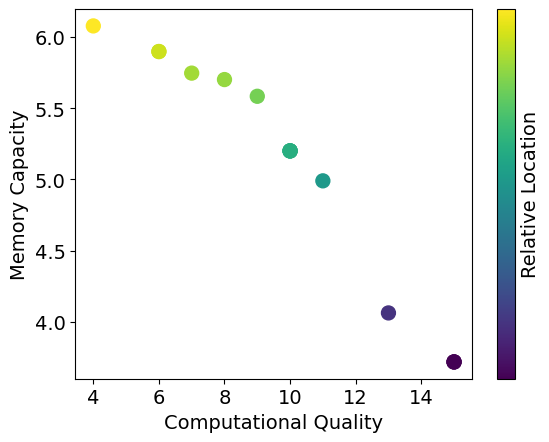

In [25]:
# 绘制一个scatter图，横坐标是CQ，纵坐标是MC，用颜色来区分不同的scatter
plt.scatter(data2['attr_CQ'], data2['attr_MC'], c=data2['attr_MC'], cmap='viridis', s=100)
cbar = plt.colorbar(label='Relative Location', ticks=[])
cbar.set_label('Relative Location', fontsize=14)
plt.xlabel('Computational Quality', fontsize=14)
plt.ylabel('Memory Capacity', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


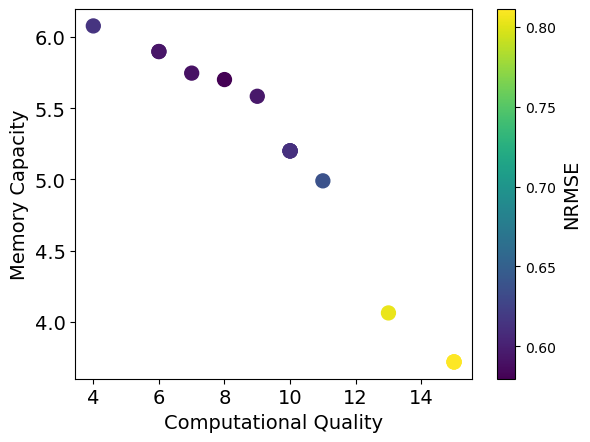

In [26]:
# 绘制一个scatter图，横坐标是CQ，纵坐标是MC
plt.scatter(data2['attr_CQ'], data2['attr_MC'], c=data1['narma10_nrmse'], cmap='viridis', s=100)
cbar = plt.colorbar()
cbar.set_label('NRMSE', fontsize=14)
plt.xlabel('Computational Quality', fontsize=14)
plt.ylabel('Memory Capacity', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

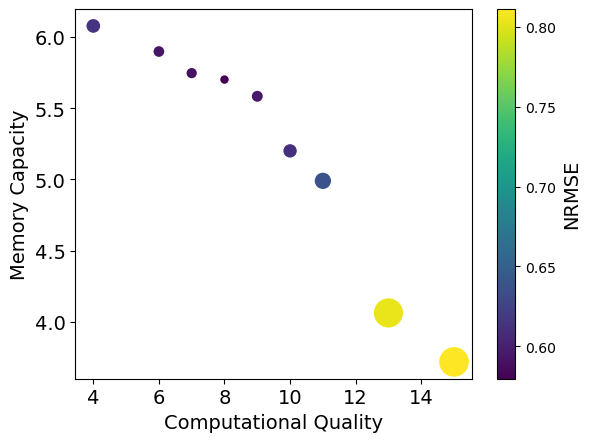

In [34]:
# 绘制一个scatter图，横坐标是CQ，纵坐标是MC
# 使用点的面积(s)来表示narma10_nrmse的数值大小，颜色统一
# 归一化narma10_nrmse到合适的面积范围
import numpy as np
nrmse = data1['narma10_nrmse']
# 归一化到[50, 500]区间作为面积
sizes = 50 + 450 * (nrmse - nrmse.min()) / (nrmse.max() - nrmse.min())
# 使用nrmse同时作为颜色和面积
sc = plt.scatter(
    data2['attr_CQ'], data2['attr_MC'],
    s=sizes, c=nrmse, cmap='viridis',
    alpha=1, edgecolors='w'
)
# 添加colorbar表示颜色对应的nrmse
cbar = plt.colorbar(sc)
cbar.set_label('NRMSE', fontsize=14)

# 添加一个自定义legend来表示面积对应的nrmse
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

for nrmse_val in np.linspace(nrmse.min(), nrmse.max(), 3):
    plt.scatter([], [], 
                s=50 + 450 * (nrmse_val - nrmse.min()) / (nrmse.max() - nrmse.min()), 
                c='gray', alpha=0.7, edgecolors='w',
                label=f'NRMSE={nrmse_val:.2f}')
plt.xlabel('Computational Quality', fontsize=14)
plt.ylabel('Memory Capacity', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

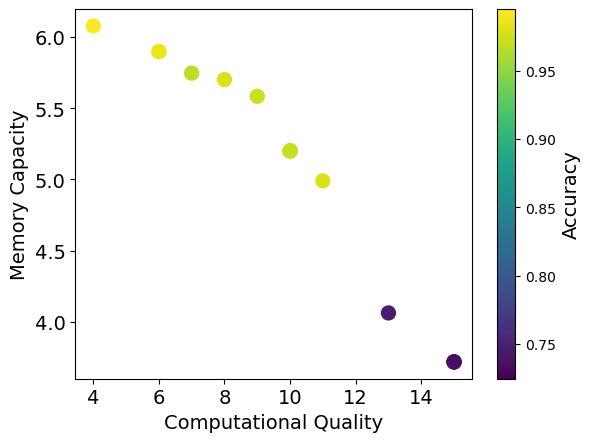

In [35]:
# 绘制一个scatter图，横坐标是CQ，纵坐标是MC
plt.scatter(data2['attr_CQ'], data2['attr_MC'], c=data1['ti46_accuracy'], cmap='viridis', s=100)
cbar = plt.colorbar()
cbar.set_label('Accuracy', fontsize=14)
plt.xlabel('Computational Quality', fontsize=14)
plt.ylabel('Memory Capacity', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

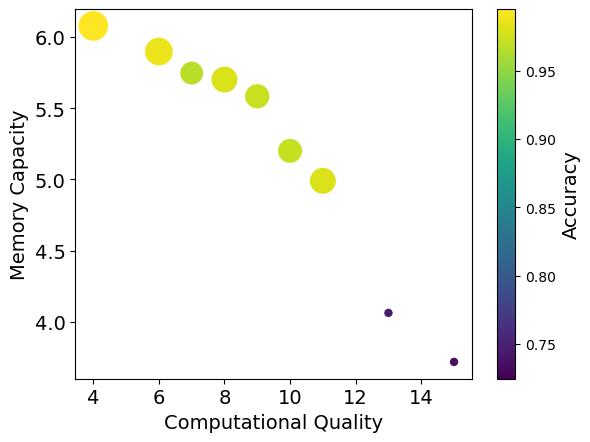

In [39]:
import numpy as np
accuracy = data1['ti46_accuracy']
# 归一化到[50, 500]区间作为面积
# 为了更好地区分数据点，将accuracy进行非线性拉伸（如指数放大），以增强小范围内的差异
scaled_accuracy = (accuracy - accuracy.min()) / (accuracy.max() - accuracy.min())
# 指数放大，指数可以根据实际分布调整（如2或3）
sizes = 50 + 450 * (scaled_accuracy ** 5)
# 使用nrmse同时作为颜色和面积
sc = plt.scatter(
    data2['attr_CQ'], data2['attr_MC'],
    s=sizes, c=accuracy, cmap='viridis',
    alpha=1, edgecolors='w'
)
# 添加colorbar表示颜色对应的nrmse
cbar = plt.colorbar(sc)
cbar.set_label('Accuracy', fontsize=14)

# 添加一个自定义legend来表示面积对应的nrmse
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

for accuracy_val in np.linspace(accuracy.min(), accuracy.max(), 3):
    plt.scatter([], [], 
                s=50 + 450 * (accuracy_val - accuracy.min()) / (accuracy.max() - accuracy.min()), 
                c='gray', alpha=0.7, edgecolors='w',
                label=f'Accuracy={accuracy_val:.2f}')
plt.xlabel('Computational Quality', fontsize=14)
plt.ylabel('Memory Capacity', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

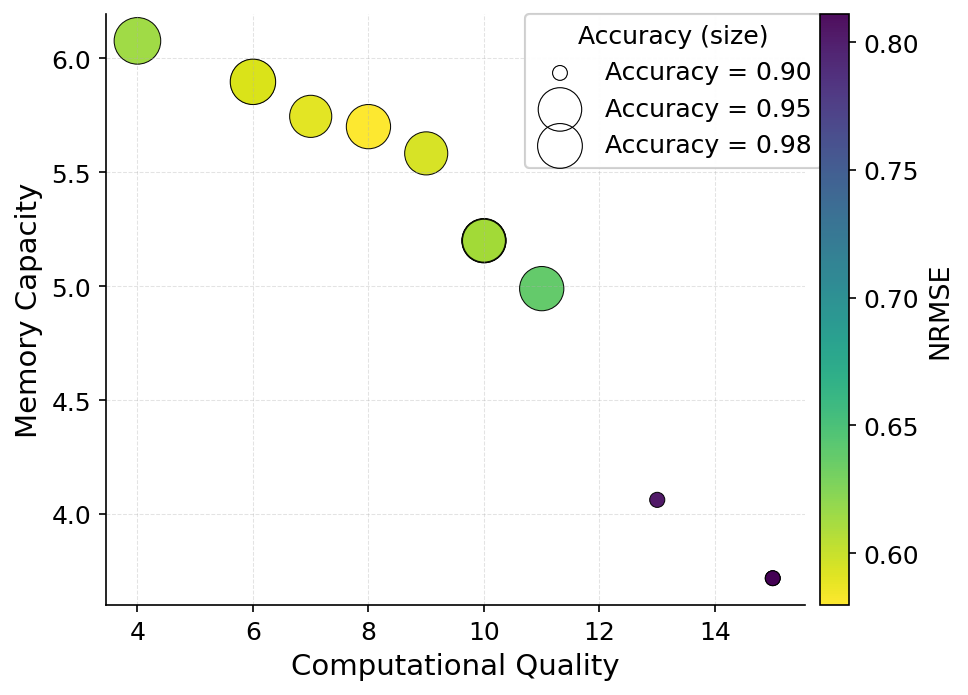

: 

In [ ]:
# 读取数据
nrmse = np.array(data1['narma10_nrmse'], dtype=float)
accuracy = np.array(data1['ti46_accuracy'], dtype=float)
cq = np.array(data2['attr_CQ'], dtype=float)
mc = np.array(data2['attr_MC'], dtype=float)
# ------------------------

# 点大 = Accuracy
acc_min, acc_max = accuracy.min(), accuracy.max()
den = acc_max - acc_min if acc_max > acc_min else 1.0
acc_scaled = (accuracy - acc_min) / den
sizes = 50 + 450 * (acc_scaled ** 2)  # [50, 500]

# ------------------------
# 绘图设置
plt.rcParams.update({
    "font.size": 12,
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "axes.spines.right": False,
    "axes.spines.top": False,
})
fig, ax = plt.subplots(figsize=(6.6, 4.8), dpi=150)
# 散点图
sc = ax.scatter(
    cq, mc,
    s=sizes,
    c=nrmse,
    cmap="viridis_r",    # 反转 colormap，深色=误差小=好
    alpha=0.95,
    edgecolors="k",
    linewidths=0.5
)
# 颜色条
cbar = plt.colorbar(sc, ax=ax, fraction=0.05, pad=0.02)
cbar.set_label("NRMSE", fontsize=13)
# ------------------------
# Accuracy 图例（用分位数表示）
# 直接用固定的Accuracy值作为图例（不使用分位数）
q_vals = np.quantile(accuracy, [0.15, 0.50, 0.85])
legend_handles = []
for acc_val in q_vals:
    size = 50 + 450 * (((acc_val - acc_min) / den) ** 2)
    h = ax.scatter([], [], s=size, c='none', edgecolors='k', linewidths=0.5)
    legend_handles.append(h)
leg_labels = [f'Accuracy = {v:.2f}' for v in legend_accs]
leg = ax.legend(
    legend_handles, leg_labels,
    title="Accuracy (size)",
    scatterpoints=1,
    frameon=True,
    loc='upper left',
    bbox_to_anchor=(0.6, 1.0),  # 移到图外
    borderaxespad=0.0
)
ax.add_artist(leg)
# ------------------------
# 坐标轴与网格
ax.set_xlabel("Computational Quality")
ax.set_ylabel("Memory Capacity")
ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.35)
plt.tight_layout()

让我们来看看CQ_MC_Pareto_Tri

In [27]:
# 提取数据
filename_path1 = r"C:\Users\Chen\Desktop\Repository\spnc_taskindependent_metrics\ParetoFront_CQandMC\CQ_MC_Pareto_SoftGate_Tri_20250906_203559_pareto.csv"
filename_path2 = r"C:\Users\Chen\Desktop\Repository\spnc_taskindependent_metrics\saved_studies\CQ_MC_Pareto_SoftGate_Tri_20250906_203559_pareto.csv"

data2 = collect_data(filename_path2)
data1 = collect_data(filename_path1)

print(data1)


    trial_number     gamma     theta        m0  beta_prime  narma10_nrmse  \
0            273  0.054492  0.080011  0.017767        50.0       0.700217   
1            293  0.054492  0.109402  0.067946        50.0       0.697716   
2            328  0.054492  0.109402  0.067946        50.0       0.697716   
3            334  0.054492  0.140065  0.047237        50.0       0.684839   
4            379  0.054492  0.308385  0.092806        50.0       0.943873   
5            384  0.051817  0.152049  0.092806        50.0       0.809600   
6            449  0.054492  0.308385  0.092806        50.0       0.943873   
7            452  0.054492  0.106967  0.033361        50.0       0.691337   
8            474  0.078975  0.408394  0.091490        50.0      20.389773   
9            522  0.054492  0.080011  0.017767        50.0       0.700217   
10           531  0.054492  0.106967  0.081530        50.0       0.715421   
11           547  0.054492  0.109402  0.026621        50.0       0.715942   

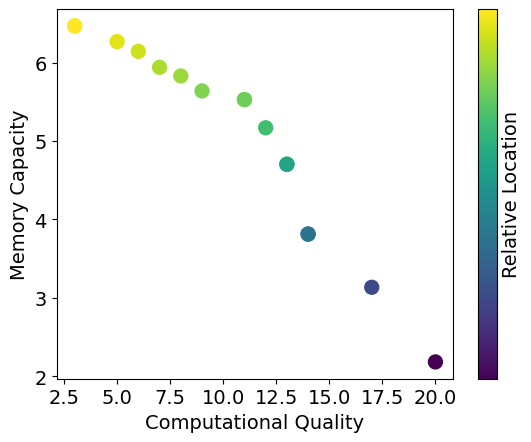

In [4]:
# 绘制一个scatter图，横坐标是CQ，纵坐标是MC，用颜色来区分不同的scatter
plt.scatter(data2['attr_CQ'], data2['attr_MC'], c=data2['attr_MC'], cmap='viridis', s=100)
cbar = plt.colorbar(label='Relative Location', ticks=[])
cbar.set_label('Relative Location', fontsize=14)
plt.xlabel('Computational Quality', fontsize=14)
plt.ylabel('Memory Capacity', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

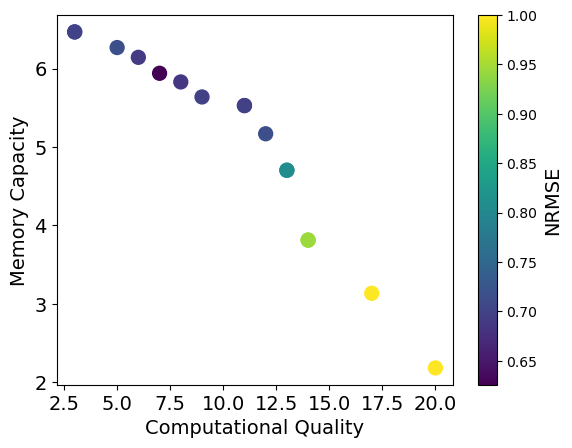

In [14]:
# 绘制一个scatter图，横坐标是CQ，纵坐标是MC
import numpy as np

# 将narma10_nrmse大于1的都设为1.01（或其他固定值），以便用同一颜色表示
nrmse = np.array(data1['narma10_nrmse'])
nrmse_capped = np.where(nrmse > 1, 1, nrmse)  # 1.01会被colormap映射为同一颜色

# 自定义colormap：将1.01及以上的值都映射为同一颜色
from matplotlib import cm, colors

# 设定norm，使得1.01及以上的值都为colormap的最后一个颜色
norm = colors.Normalize(vmin=nrmse_capped.min(), vmax=1.0)

sc = plt.scatter(data2['attr_CQ'], data2['attr_MC'], c=nrmse_capped, cmap='viridis', norm=norm, s=100)
cbar = plt.colorbar(sc)
cbar.set_label('NRMSE', fontsize=14)

# # 在colorbar上标注“>1”对应的颜色
# tick_locs = list(cbar.get_ticks())
# if 1.01 not in tick_locs:
#     tick_locs.append(1.01)
#     cbar.set_ticks(tick_locs)
#     ticklabels = [f"{tick:.2f}" if tick < 1.01 else ">1" for tick in tick_locs]
#     cbar.set_ticklabels(ticklabels)

plt.xlabel('Computational Quality', fontsize=14)
plt.ylabel('Memory Capacity', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

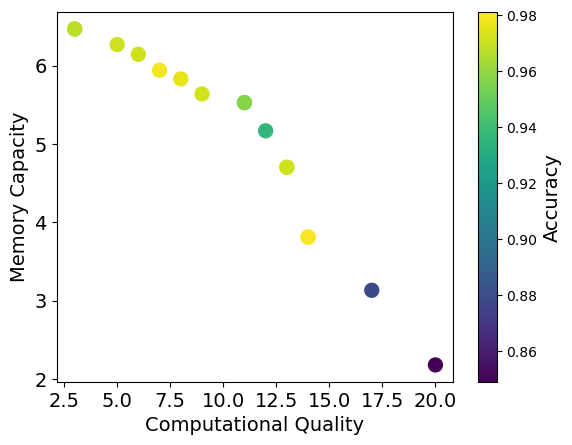

In [8]:
# 绘制一个scatter图，横坐标是CQ，纵坐标是MC
plt.scatter(data2['attr_CQ'], data2['attr_MC'], c=data1['ti46_accuracy'], cmap='viridis', s=100)
cbar = plt.colorbar()
cbar.set_label('Accuracy', fontsize=14)
plt.xlabel('Computational Quality', fontsize=14)
plt.ylabel('Memory Capacity', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

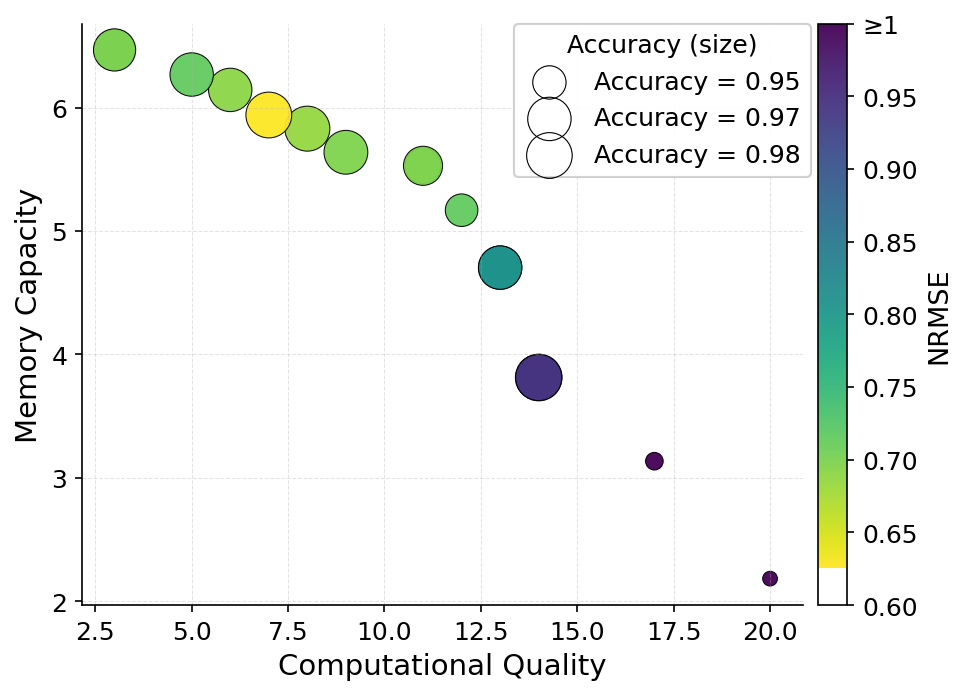

In [31]:
# 读取数据
nrmse = np.array(data1['narma10_nrmse'], dtype=float)
accuracy = np.array(data1['ti46_accuracy'], dtype=float)
cq = np.array(data2['attr_CQ'], dtype=float)
mc = np.array(data2['attr_MC'], dtype=float)
# ------------------------

# 点大 = Accuracy
acc_min, acc_max = accuracy.min(), accuracy.max()
den = acc_max - acc_min if acc_max > acc_min else 1.0
acc_scaled = (accuracy - acc_min) / den
sizes = 50 + 450 * (acc_scaled ** 2)  # [50, 500]

# ------------------------
# 绘图设置
plt.rcParams.update({
    "font.size": 12,
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "axes.spines.right": False,
    "axes.spines.top": False,
})
fig, ax = plt.subplots(figsize=(6.6, 4.8), dpi=150)

# nrmse超过1（包含1）的显示同一个颜色
nrmse_capped = np.copy(nrmse)
nrmse_capped[nrmse_capped >= 1.0] = 1.0
norm = plt.Normalize(vmin=nrmse_capped.min(), vmax=1.0)

# 散点图
sc = ax.scatter(
    cq, mc,
    s=sizes,
    c=nrmse_capped,
    cmap="viridis_r",    # 反转 colormap，深色=误差小=好
    norm=norm,
    alpha=0.95,
    edgecolors="k",
    linewidths=0.5
)
# 颜色条
cbar = plt.colorbar(sc, ax=ax, fraction=0.05, pad=0.02)
cbar.set_label("NRMSE", fontsize=13)

# 修改colorbar的ticks和labels，使1.0及以上显示为">=1"
ticks = cbar.get_ticks()
if 1.0 not in ticks:
    ticks = np.append(ticks, 1.0)
ticks = np.sort(np.unique(ticks))
ticklabels = []
for t in ticks:
    if t < 1.0:
        ticklabels.append(f"{t:.2f}")
    else:
        ticklabels.append("≥1")
cbar.set_ticks(ticks)
cbar.set_ticklabels(ticklabels)
# ------------------------
# Accuracy 图例（用分位数表示）
# 直接用固定的Accuracy值作为图例（不使用分位数）
# 根据accuracy数据范围自动划分图例（3个分位点：20%、60%、95%）
q_vals = np.quantile(accuracy, [0.15, 0.50, 0.85])
legend_handles = []
for acc_val in q_vals:
    size = 50 + 450 * (((acc_val - acc_min) / den) ** 2)
    h = ax.scatter([], [], s=size, c='none', edgecolors='k', linewidths=0.5)
    legend_handles.append(h)
    
leg_labels = [f'Accuracy = {v:.2f}' for v in legend_accs]
leg = ax.legend(
    legend_handles, leg_labels,
    title="Accuracy (size)",
    scatterpoints=1,
    frameon=True,
    loc='upper left',
    bbox_to_anchor=(0.6, 1.0), 
    borderaxespad=0.0
)
ax.add_artist(leg)
# ------------------------
# 坐标轴与网格
ax.set_xlabel("Computational Quality")
ax.set_ylabel("Memory Capacity")
ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.35)
plt.tight_layout()

绘制新的数据

In [22]:
# 提取数据
# MC和CQ_max数据
filename_path1 = r"C:\Users\Chen\Desktop\Repository\spnc_taskindependent_metrics\saved_studies\CQ_MC_Pareto_beta50_20250825_121711_pareto.csv"
# CQ_-11和任务表现数据
filename_path2 = r"C:\Users\Chen\Desktop\Repository\spnc_taskindependent_metrics\ParetoFront_CQandMC\CQ_MC_Pareto_beta50_20250825_121711_normalized-11_pareto.csv"
# CQ_01数据
filename_path3 = r"C:\Users\Chen\Desktop\Repository\spnc_taskindependent_metrics\ParetoFront_CQandMC\CQ_MC_Pareto_beta50_20250825_121711_pareto_normalized01.csv"
# CQ_without数据
filename_path4 = r"C:\Users\Chen\Desktop\Repository\spnc_taskindependent_metrics\ParetoFront_CQandMC\CQ_MC_Pareto_beta50_20250825_121711_pareto_without.csv"

def collect_data(filename_path):
    # 读取pareto文件
    data = pd.read_csv(filename_path)
    return data  # 需要返回数据，否则默认返回None

data1 = collect_data(filename_path1)
data2 = collect_data(filename_path2)
data3 = collect_data(filename_path3)
data4 = collect_data(filename_path4)


import ast
MC = data1["values"].apply(lambda x: ast.literal_eval(x)[1])

CQ_max = data1["values"].apply(lambda x: ast.literal_eval(x)[0])

CQ_minmax = data2["kr_threshold"]-data2['gr_threshold'] 

CQ_01 = data3["kr_threshold"]-data3['gr_threshold'] 

CQ_without = data4["kr_threshold"]-data4['gr_threshold'] 

nrmse = data2['narma10_nrmse']

error_rate = (1-np.array(data2['ti46_accuracy']))*100




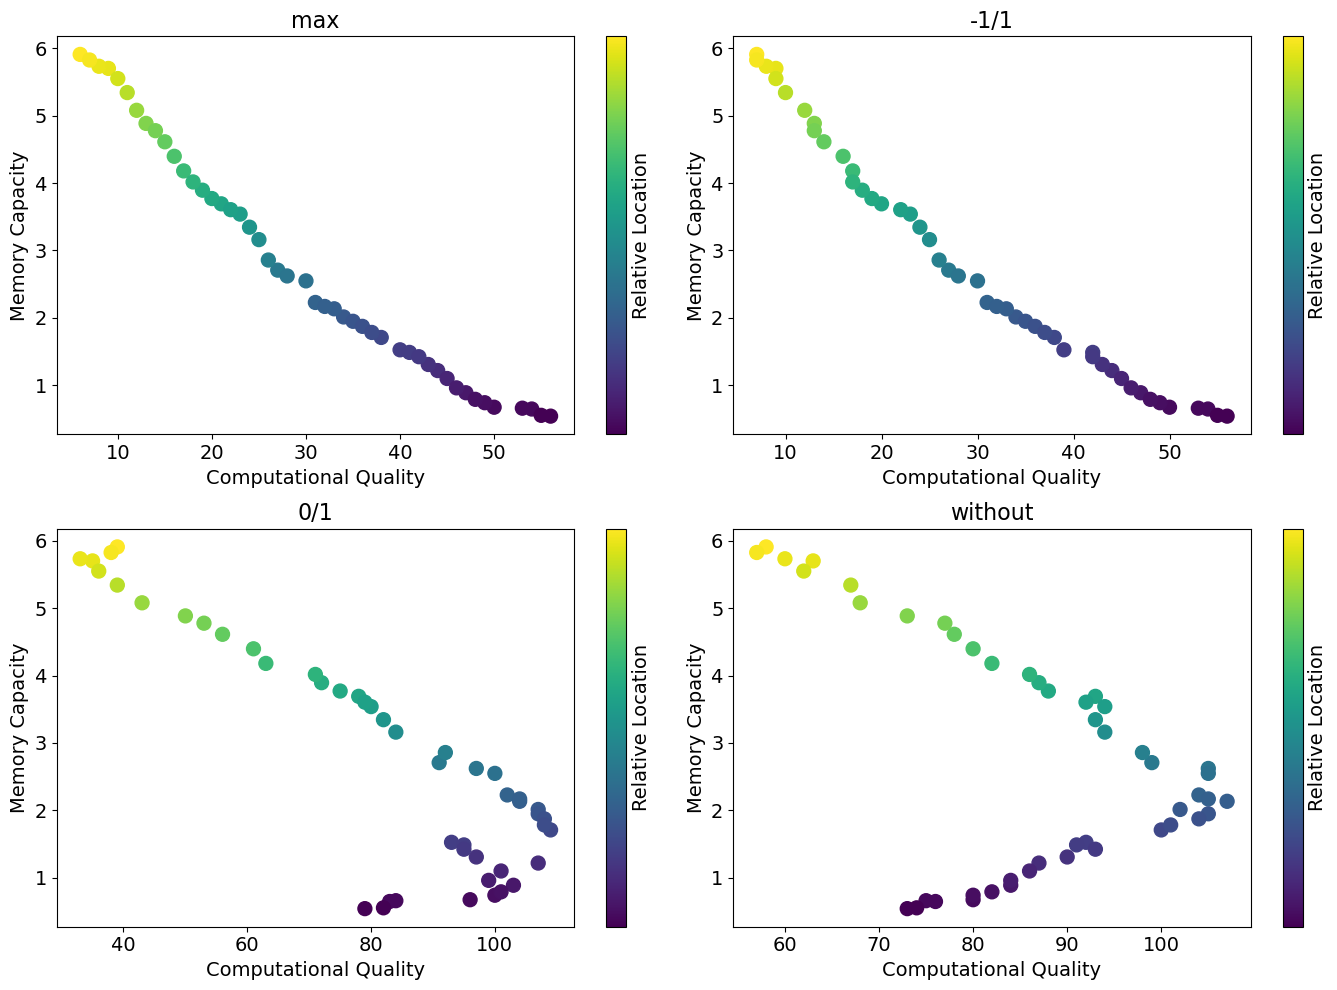

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# 第一个子图：CQ_max
sc1 = axs[0,0].scatter(CQ_max, MC, c=MC, cmap='viridis', s=100)
cbar1 = plt.colorbar(sc1, ax=axs[0,0],ticks=[])
cbar1.set_label('Relative Location', fontsize=14)
axs[0,0].set_xlabel('Computational Quality', fontsize=14)
axs[0,0].set_ylabel('Memory Capacity', fontsize=14)
axs[0,0].tick_params(axis='both', labelsize=14)
axs[0,0].set_title('max', fontsize=16)

# 第二个子图：CQ_minmax
sc2 = axs[0,1].scatter(CQ_minmax, MC, c=MC, cmap='viridis', s=100)
cbar2 = plt.colorbar(sc2, ax=axs[0,1],ticks=[])
cbar2.set_label('Relative Location', fontsize=14)
axs[0,1].set_xlabel('Computational Quality', fontsize=14)
axs[0,1].set_ylabel('Memory Capacity', fontsize=14)
axs[0,1].tick_params(axis='both', labelsize=14)
axs[0,1].set_title('-1/1', fontsize=16)

# 第三个子图：CQ_01
sc3 = axs[1,0].scatter(CQ_01, MC, c=MC, cmap='viridis', s=100)
cbar3 = plt.colorbar(sc3, ax=axs[1,0],ticks=[])
cbar3.set_label('Relative Location', fontsize=14)
axs[1,0].set_xlabel('Computational Quality', fontsize=14)
axs[1,0].set_ylabel('Memory Capacity', fontsize=14)
axs[1,0].tick_params(axis='both', labelsize=14)
axs[1,0].set_title('0/1', fontsize=16)

# 第四个子图：CQ_without
sc4 = axs[1,1].scatter(CQ_without, MC, c=MC, cmap='viridis', s=100)
cbar4 = plt.colorbar(sc4, ax=axs[1,1],ticks=[])
cbar4.set_label('Relative Location', fontsize=14)
axs[1,1].set_xlabel('Computational Quality', fontsize=14)
axs[1,1].set_ylabel('Memory Capacity', fontsize=14)
axs[1,1].tick_params(axis='both', labelsize=14)
axs[1,1].set_title('without', fontsize=16)

plt.tight_layout()
plt.show()

C:\Users\Chen\AppData\Local\Temp\ipykernel_21804\1424512044.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nrmse[nrmse>0.85]=0.86


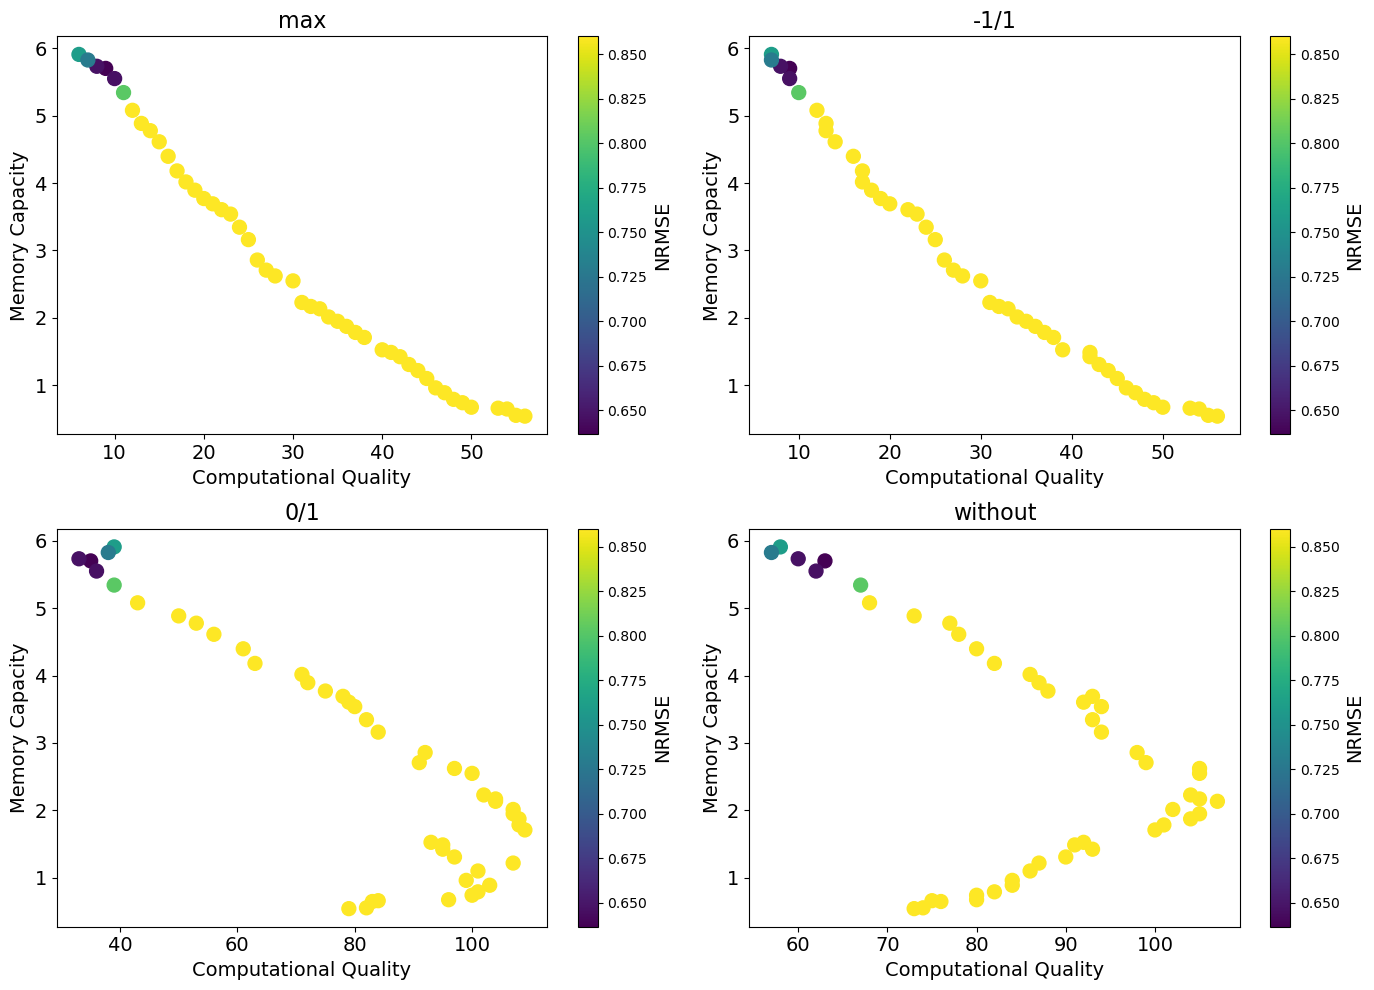

In [37]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

nrmse[nrmse>0.85]=0.86

# 第一个子图：CQ_max
sc1 = axs[0,0].scatter(CQ_max, MC, c=nrmse, cmap='viridis', s=100)
cbar1 = plt.colorbar(sc1, ax=axs[0,0])
cbar1.set_label('NRMSE', fontsize=14)
axs[0,0].set_xlabel('Computational Quality', fontsize=14)
axs[0,0].set_ylabel('Memory Capacity', fontsize=14)
axs[0,0].tick_params(axis='both', labelsize=14)
axs[0,0].set_title('max', fontsize=16)

# 第二个子图：CQ_minmax
sc2 = axs[0,1].scatter(CQ_minmax, MC, c=nrmse, cmap='viridis', s=100)
cbar2 = plt.colorbar(sc2, ax=axs[0,1])
cbar2.set_label('NRMSE', fontsize=14)
axs[0,1].set_xlabel('Computational Quality', fontsize=14)
axs[0,1].set_ylabel('Memory Capacity', fontsize=14)
axs[0,1].tick_params(axis='both', labelsize=14)
axs[0,1].set_title('-1/1', fontsize=16)

# 第三个子图：CQ_01
sc3 = axs[1,0].scatter(CQ_01, MC, c=nrmse, cmap='viridis', s=100)
cbar3 = plt.colorbar(sc3, ax=axs[1,0])
cbar3.set_label('NRMSE', fontsize=14)
axs[1,0].set_xlabel('Computational Quality', fontsize=14)
axs[1,0].set_ylabel('Memory Capacity', fontsize=14)
axs[1,0].tick_params(axis='both', labelsize=14)
axs[1,0].set_title('0/1', fontsize=16)

# 第四个子图：CQ_without
sc4 = axs[1,1].scatter(CQ_without, MC, c=nrmse, cmap='viridis', s=100)
cbar4 = plt.colorbar(sc4, ax=axs[1,1])
cbar4.set_label('NRMSE', fontsize=14)
axs[1,1].set_xlabel('Computational Quality', fontsize=14)
axs[1,1].set_ylabel('Memory Capacity', fontsize=14)
axs[1,1].tick_params(axis='both', labelsize=14)
axs[1,1].set_title('without', fontsize=16)

plt.tight_layout()
plt.show()

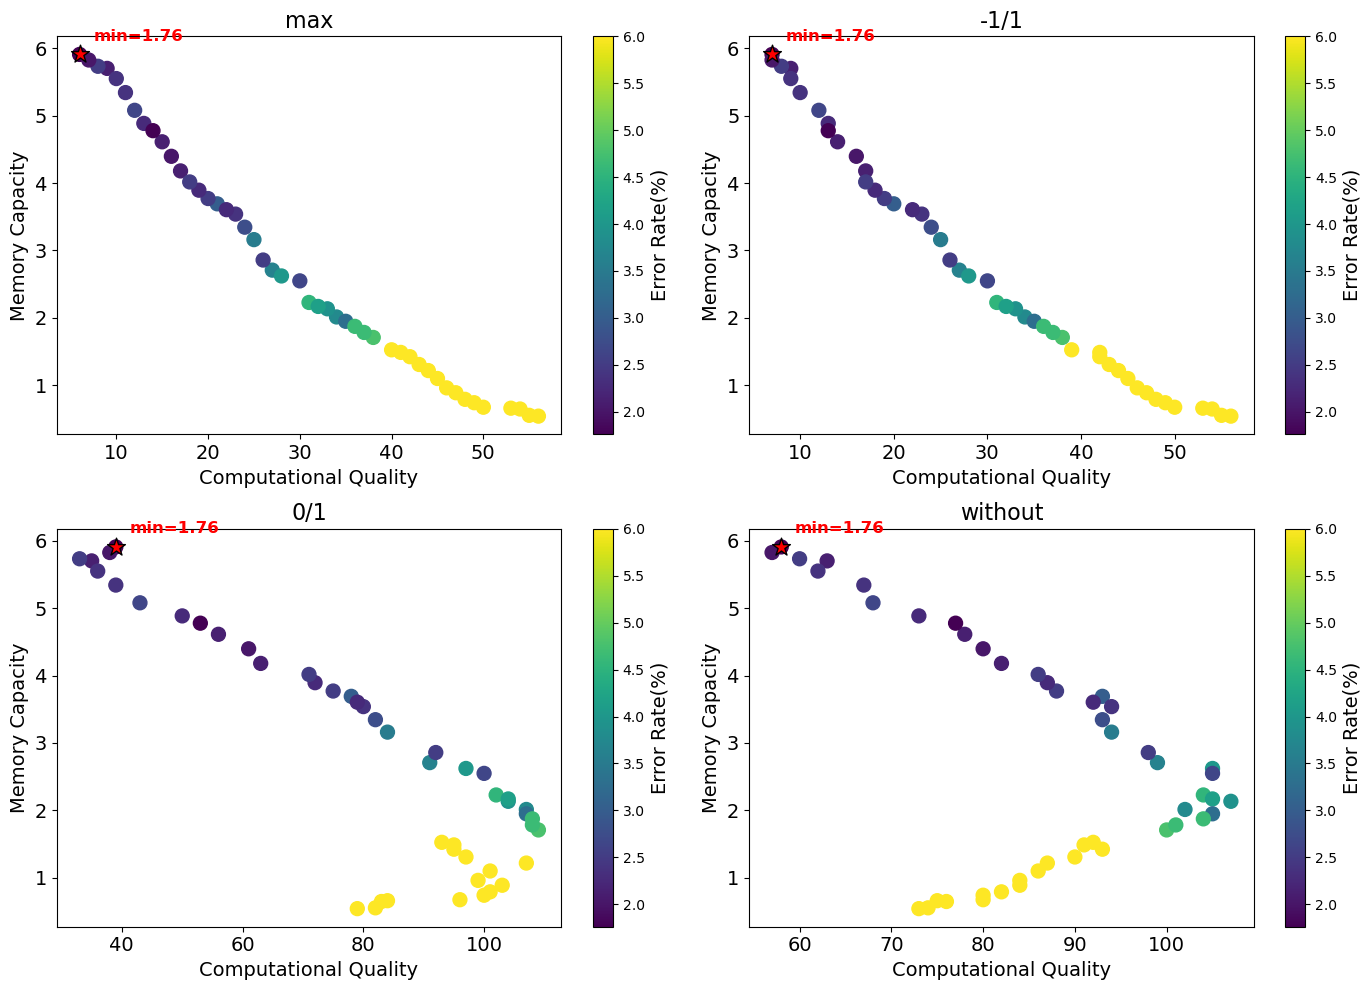

In [42]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

error_rate[error_rate > 5] = 6

# 找到error_rate最小值的索引
min_idx = error_rate.idxmin() if hasattr(error_rate, "idxmin") else np.argmin(error_rate)
min_val = error_rate[min_idx]

# 第一个子图：CQ_max
sc1 = axs[0, 0].scatter(CQ_max, MC, c=error_rate, cmap='viridis', s=100)
cbar1 = plt.colorbar(sc1, ax=axs[0, 0])
cbar1.set_label('Error Rate(%)', fontsize=14)
axs[0, 0].set_xlabel('Computational Quality', fontsize=14)
axs[0, 0].set_ylabel('Memory Capacity', fontsize=14)
axs[0, 0].tick_params(axis='both', labelsize=14)
axs[0, 0].set_title('max', fontsize=16)
# 标注error_rate最小值的点
axs[0, 0].scatter(CQ_max[min_idx], MC[min_idx], color='red', s=180, edgecolors='black', marker='*', zorder=10)
axs[0, 0].annotate(f"min={min_val:.2f}", (CQ_max[min_idx], MC[min_idx]), 
                   textcoords="offset points", xytext=(10, 10), ha='left', fontsize=12, color='red', fontweight='bold')

# 第二个子图：CQ_minmax
sc2 = axs[0, 1].scatter(CQ_minmax, MC, c=error_rate, cmap='viridis', s=100)
cbar2 = plt.colorbar(sc2, ax=axs[0, 1])
cbar2.set_label('Error Rate(%)', fontsize=14)
axs[0, 1].set_xlabel('Computational Quality', fontsize=14)
axs[0, 1].set_ylabel('Memory Capacity', fontsize=14)
axs[0, 1].tick_params(axis='both', labelsize=14)
axs[0, 1].set_title('-1/1', fontsize=16)
axs[0, 1].scatter(CQ_minmax[min_idx], MC[min_idx], color='red', s=180, edgecolors='black', marker='*', zorder=10)
axs[0, 1].annotate(f"min={min_val:.2f}", (CQ_minmax[min_idx], MC[min_idx]), 
                   textcoords="offset points", xytext=(10, 10), ha='left', fontsize=12, color='red', fontweight='bold')

# 第三个子图：CQ_01
sc3 = axs[1, 0].scatter(CQ_01, MC, c=error_rate, cmap='viridis', s=100)
cbar3 = plt.colorbar(sc3, ax=axs[1, 0])
cbar3.set_label('Error Rate(%)', fontsize=14)
axs[1, 0].set_xlabel('Computational Quality', fontsize=14)
axs[1, 0].set_ylabel('Memory Capacity', fontsize=14)
axs[1, 0].tick_params(axis='both', labelsize=14)
axs[1, 0].set_title('0/1', fontsize=16)
axs[1, 0].scatter(CQ_01[min_idx], MC[min_idx], color='red', s=180, edgecolors='black', marker='*', zorder=10)
axs[1, 0].annotate(f"min={min_val:.2f}", (CQ_01[min_idx], MC[min_idx]), 
                   textcoords="offset points", xytext=(10, 10), ha='left', fontsize=12, color='red', fontweight='bold')

# 第四个子图：CQ_without
sc4 = axs[1, 1].scatter(CQ_without, MC, c=error_rate, cmap='viridis', s=100)
cbar4 = plt.colorbar(sc4, ax=axs[1, 1])
cbar4.set_label('Error Rate(%)', fontsize=14)
axs[1, 1].set_xlabel('Computational Quality', fontsize=14)
axs[1, 1].set_ylabel('Memory Capacity', fontsize=14)
axs[1, 1].tick_params(axis='both', labelsize=14)
axs[1, 1].set_title('without', fontsize=16)
axs[1, 1].scatter(CQ_without[min_idx], MC[min_idx], color='red', s=180, edgecolors='black', marker='*', zorder=10)
axs[1, 1].annotate(f"min={min_val:.2f}", (CQ_without[min_idx], MC[min_idx]), 
                   textcoords="offset points", xytext=(10, 10), ha='left', fontsize=12, color='red', fontweight='bold')

plt.tight_layout()
plt.show()

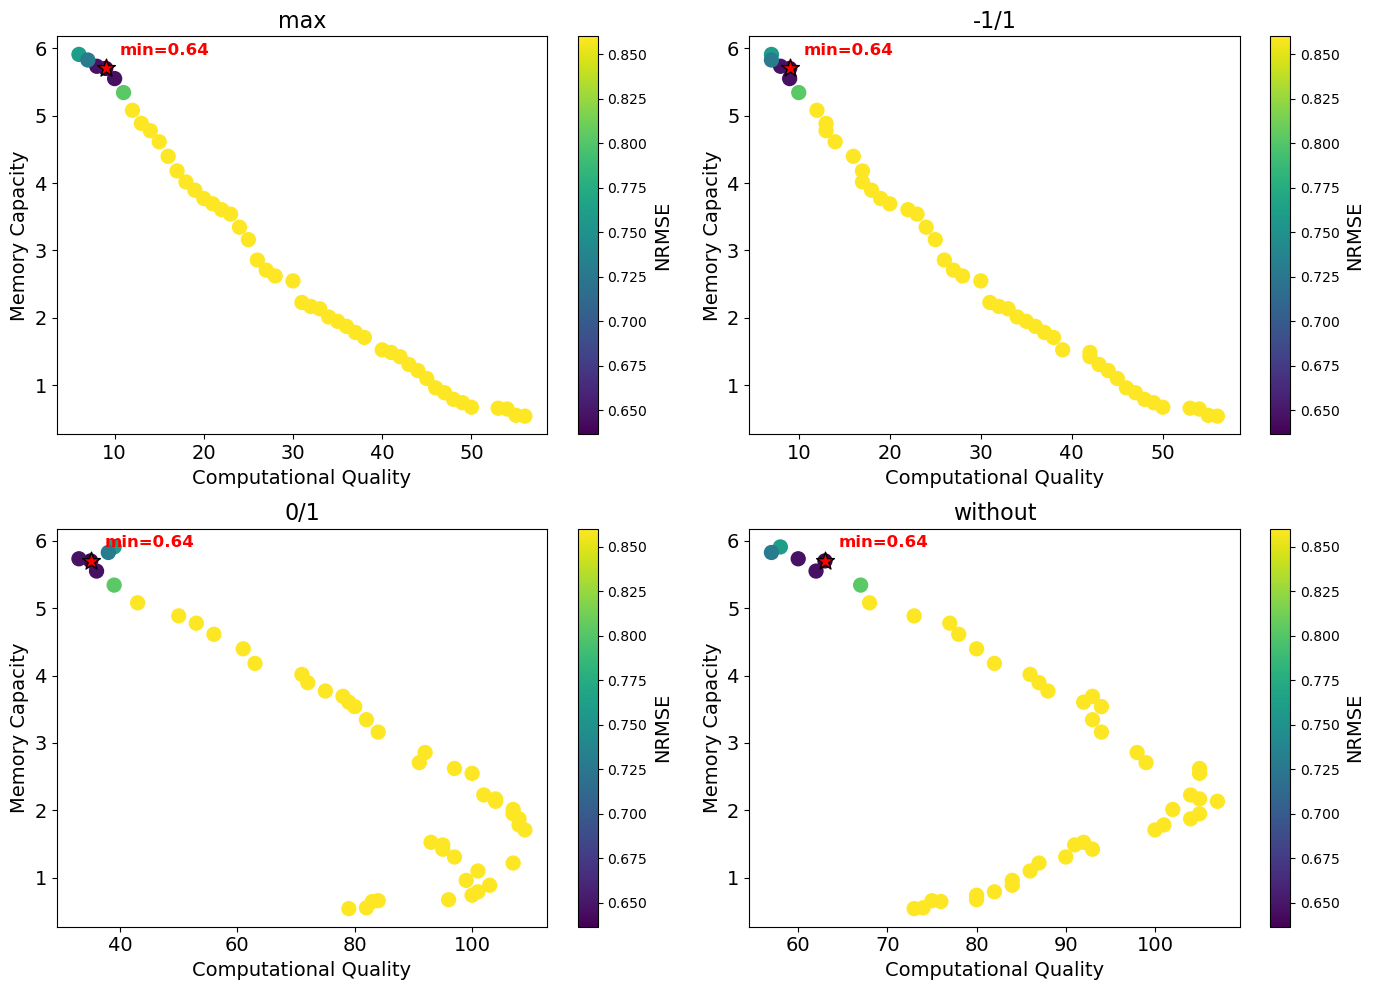

In [43]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))


# 找到error_rate最小值的索引
min_idx = nrmse.idxmin() if hasattr(nrmse, "idxmin") else np.argmin(nrmse)
min_val = nrmse[min_idx]

# 第一个子图：CQ_max
sc1 = axs[0, 0].scatter(CQ_max, MC, c=nrmse, cmap='viridis', s=100)
cbar1 = plt.colorbar(sc1, ax=axs[0, 0])
cbar1.set_label('NRMSE', fontsize=14)
axs[0, 0].set_xlabel('Computational Quality', fontsize=14)
axs[0, 0].set_ylabel('Memory Capacity', fontsize=14)
axs[0, 0].tick_params(axis='both', labelsize=14)
axs[0, 0].set_title('max', fontsize=16)
# 标注error_rate最小值的点
axs[0, 0].scatter(CQ_max[min_idx], MC[min_idx], color='red', s=180, edgecolors='black', marker='*', zorder=10)
axs[0, 0].annotate(f"min={min_val:.2f}", (CQ_max[min_idx], MC[min_idx]), 
                   textcoords="offset points", xytext=(10, 10), ha='left', fontsize=12, color='red', fontweight='bold')

# 第二个子图：CQ_minmax
sc2 = axs[0, 1].scatter(CQ_minmax, MC, c=nrmse, cmap='viridis', s=100)
cbar2 = plt.colorbar(sc2, ax=axs[0, 1])
cbar2.set_label('NRMSE', fontsize=14)
axs[0, 1].set_xlabel('Computational Quality', fontsize=14)
axs[0, 1].set_ylabel('Memory Capacity', fontsize=14)
axs[0, 1].tick_params(axis='both', labelsize=14)
axs[0, 1].set_title('-1/1', fontsize=16)
axs[0, 1].scatter(CQ_minmax[min_idx], MC[min_idx], color='red', s=180, edgecolors='black', marker='*', zorder=10)
axs[0, 1].annotate(f"min={min_val:.2f}", (CQ_minmax[min_idx], MC[min_idx]), 
                   textcoords="offset points", xytext=(10, 10), ha='left', fontsize=12, color='red', fontweight='bold')

# 第三个子图：CQ_01
sc3 = axs[1, 0].scatter(CQ_01, MC, c=nrmse, cmap='viridis', s=100)
cbar3 = plt.colorbar(sc3, ax=axs[1, 0])
cbar3.set_label('NRMSE', fontsize=14)
axs[1, 0].set_xlabel('Computational Quality', fontsize=14)
axs[1, 0].set_ylabel('Memory Capacity', fontsize=14)
axs[1, 0].tick_params(axis='both', labelsize=14)
axs[1, 0].set_title('0/1', fontsize=16)
axs[1, 0].scatter(CQ_01[min_idx], MC[min_idx], color='red', s=180, edgecolors='black', marker='*', zorder=10)
axs[1, 0].annotate(f"min={min_val:.2f}", (CQ_01[min_idx], MC[min_idx]), 
                   textcoords="offset points", xytext=(10, 10), ha='left', fontsize=12, color='red', fontweight='bold')

# 第四个子图：CQ_without
sc4 = axs[1, 1].scatter(CQ_without, MC, c=nrmse, cmap='viridis', s=100)
cbar4 = plt.colorbar(sc4, ax=axs[1, 1])
cbar4.set_label('NRMSE', fontsize=14)
axs[1, 1].set_xlabel('Computational Quality', fontsize=14)
axs[1, 1].set_ylabel('Memory Capacity', fontsize=14)
axs[1, 1].tick_params(axis='both', labelsize=14)
axs[1, 1].set_title('without', fontsize=16)
axs[1, 1].scatter(CQ_without[min_idx], MC[min_idx], color='red', s=180, edgecolors='black', marker='*', zorder=10)
axs[1, 1].annotate(f"min={min_val:.2f}", (CQ_without[min_idx], MC[min_idx]), 
                   textcoords="offset points", xytext=(10, 10), ha='left', fontsize=12, color='red', fontweight='bold')

plt.tight_layout()
plt.show()